# Algorytmy uczenia maszynowego – drzewa decyzyjne i lasy losowe

1. W notatniku Jupyter przygotuj sprawozdanie, w którym opiszesz co zawiera wybrany
przez Ciebie zestaw danych i podsumujesz efekty tworzenia i modelu uczenia
maszynowego z algorytmami drzewa decyzyjnego i lasu losowego. Wykorzystaj
możliwości edytora tekstowego markdown, poszczególne operacje, możesz opisać za
pomocą komentarzy w kodzie #

In [1]:
#importowanie bibliotek 
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

In [2]:
df = pd.read_csv('Airline.csv')

air = df
air.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,Personal Travel,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,Personal Travel,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,Personal Travel,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,Personal Travel,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,Personal Travel,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


2. Zbuduj model z wykorzystaniem algorytmu drzewa decyzyjnego
Chcę predykować, czy dana osoba będzie usatysfakcjonowana z lotu czy nie. Określenie hierarchii drzewa decyzyjnego: <br>
    1. Class - według mnie najbardziej determinuje wskaźnik satysfakcji <br>
    2. Departure Delay in Minutes <br>
    3. On-board service <br>
    4. Cleanliness 

In [3]:
#zamiana wartości "satisfaction"
df['satisfaction'] = df['satisfaction'].replace({'dissatisfied': '0', 'satisfied':'1'})
df.to_csv("Airline.csv", index=False)

#zamiana wartości "Gender"
df['Gender'] = df['Gender'].replace({'Female': '0', 'Male':'1'})
df.to_csv("Airline.csv", index=False)

#zamiana wartości "Customer Type"
df['Customer Type'] = df['Customer Type'].replace({'Loyal Customer': '0', 'disloyal Customer':'1'})
df.to_csv("Airline.csv", index=False)

#zamiana wartości "Class"
df['Class'] = df['Class'].replace({'Eco': '0', 'Eco Plus':'1', 'Business':'2'})
df.to_csv("Airline.csv", index=False)

air.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,Personal Travel,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,Personal Travel,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,Personal Travel,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,Personal Travel,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,Personal Travel,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
# wyniki dla pasażera klasy drugiej, z 0 opóźnieniem, obsługą w skali 3, i czystością w skali 2
#drzewo decyzyjne 
df = pd.read_csv('Airline.csv')
X = df[['Class', 'Departure Delay in Minutes', 'On-board service', 'Cleanliness']].values
y = df['satisfaction'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.predict([[2, 0, 3, 2]]))

[1]


3. Dostrój model przy wykorzystaniu wskaźnika Giniego oraz entropii

In [29]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv('Airline.csv')
X = df[['Class', 'Departure Delay in Minutes', 'On-board service', 'Cleanliness']].values
Y = df['satisfaction'].values
kf = KFold(n_splits=5, shuffle=True)
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, Y_train)
        Y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(Y_test, Y_pred))
        precision.append(precision_score(Y_test, Y_pred))
        recall.append(recall_score(Y_test, Y_pred))
print("accuracy:", np.mean(accuracy))
print("precision:", np.mean(precision))
print("recall:", np.mean(recall), '\n')
print()


Decision Tree - gini
Decision Tree - entropy
accuracy: 0.7229057591623036
precision: 0.7494580768682387
recall: 0.7416941535350479 




4. Przytnij drzewo decyzyjne i dokonaj jego ewaluacji, wybierz najlepszy model
i uzasadnij wybór

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('Airline.csv')

X = df[['Class', 'Departure Delay in Minutes', 'On-board service', 'Cleanliness']].values
y = df['satisfaction'].values
param_grid = {
 'max_depth': [5, 10, 20, 30, 40],
 'min_samples_leaf': [2, 5, 7],
 'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)


best params: {'max_depth': 10, 'max_leaf_nodes': 35, 'min_samples_leaf': 2}


In [36]:
#ewaluacja
print("best score:", gs.best_score_)

best score: 0.6456455595643895


5. Zwizualizuj zbudowany przez siebie model drzewa decyzyjnego przy wykorzystaniu
aplikacji GraphViz lub biblioteki Matplotlib, skorzystaj z tutoriala
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learngraphviz-matplotlib-1c50b4aa68dc 

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['satisfaction'] = data.target

In [12]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     satisfaction  
0      

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['satisfaction'], random_state=0)

In [14]:
#Matplotlib
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, Y_train)
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

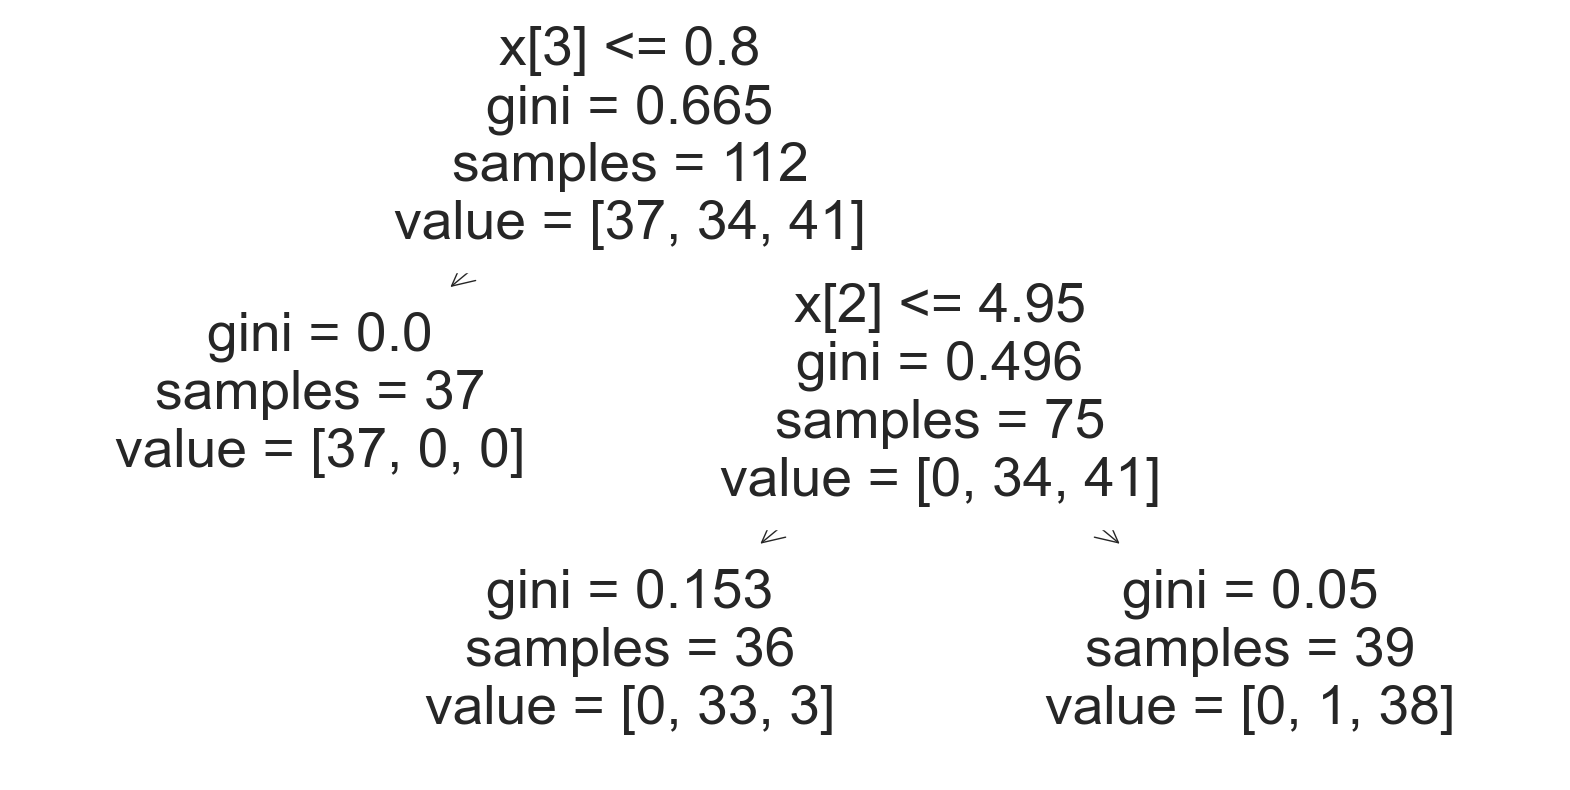

In [15]:
tree.plot_tree(clf);

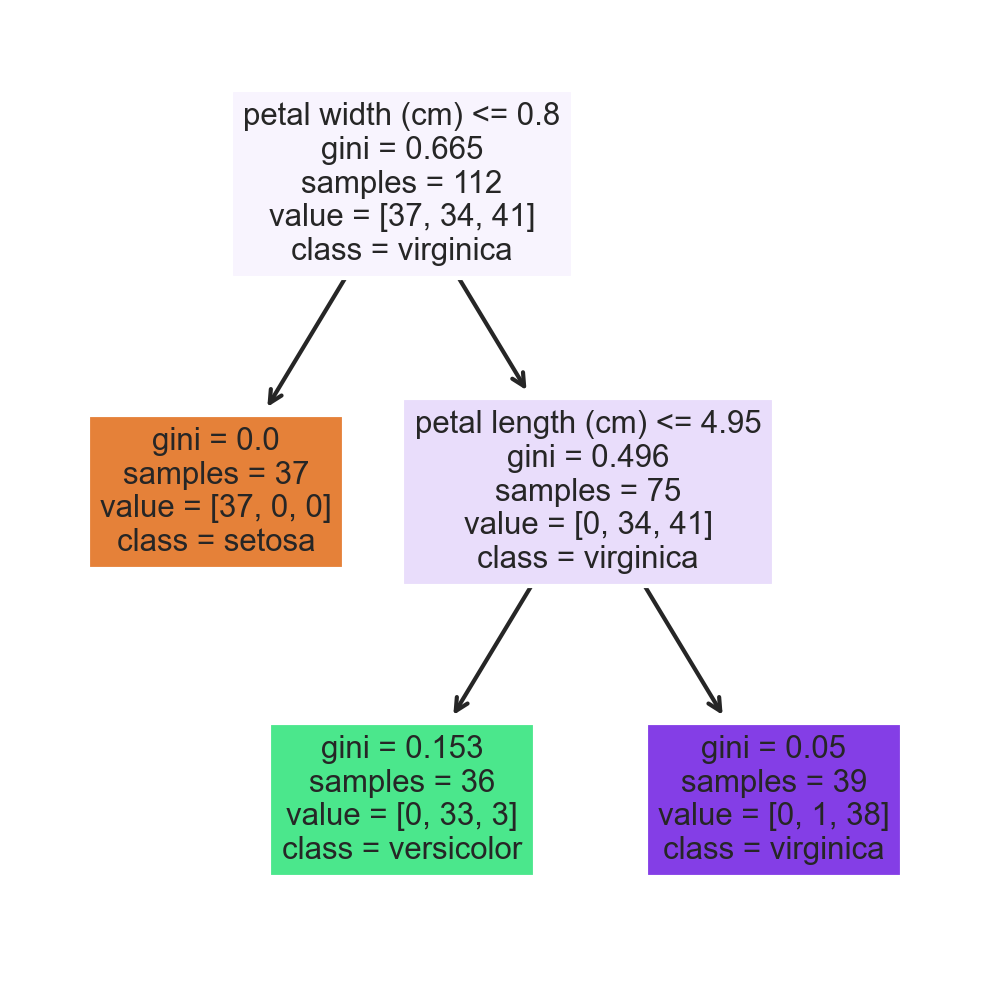

In [16]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = fn, class_names=cn, filled = True);

dodatkowa wizualizacja drzewa

In [18]:
from sklearn import tree
df = pd.read_csv('Airline.csv')

X = df[['Class', 'Departure Delay in Minutes', 'On-board service', 'Cleanliness']].values
Y = df['satisfaction'].values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[2, 0, 3, 2]])

print(model.predict([[2, 0, 3, 2]]))

[1]


In [19]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, Y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

[Ellipsis]

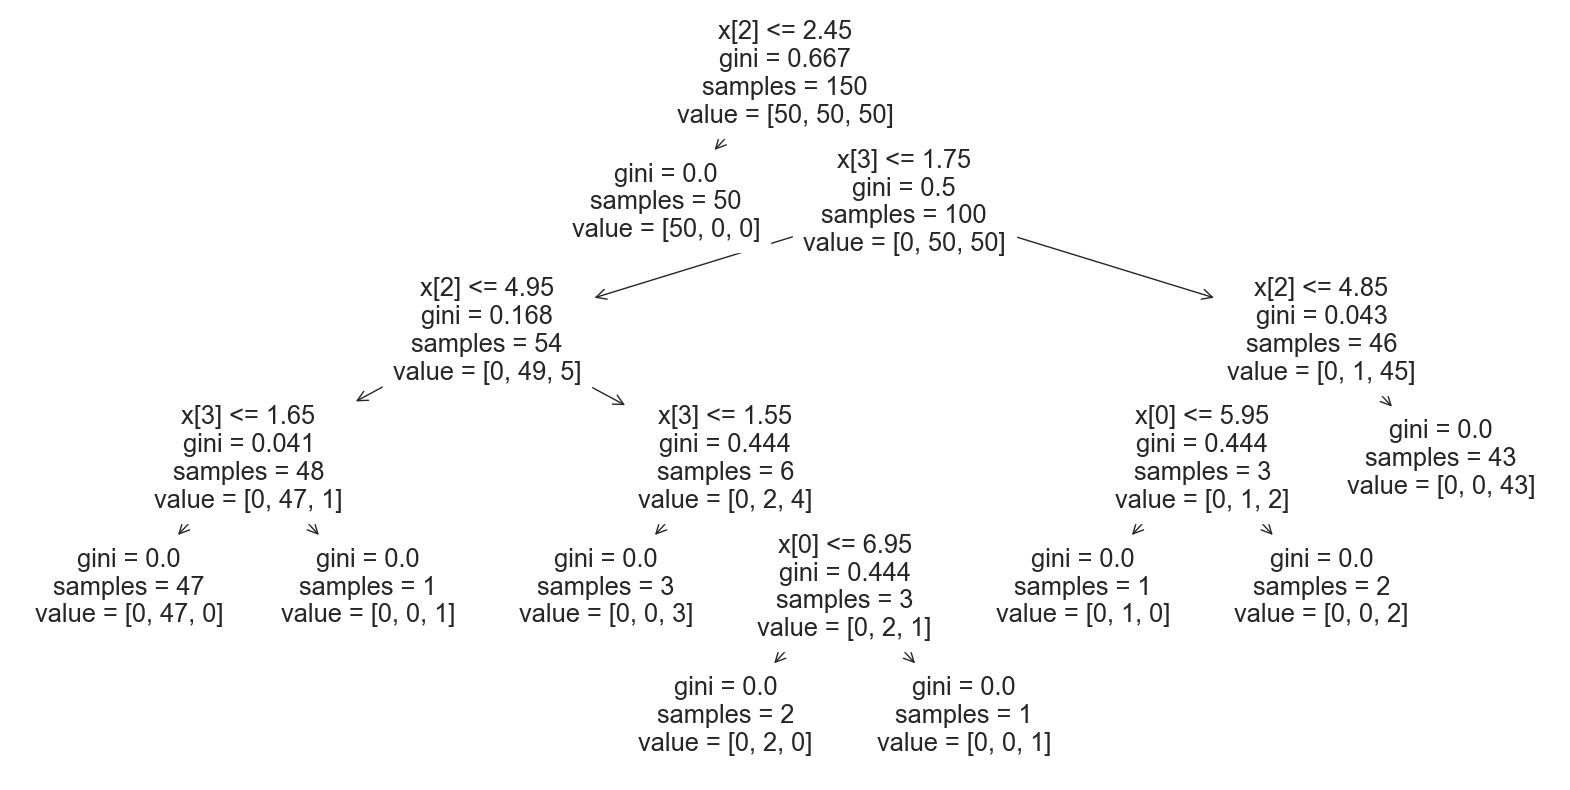

In [20]:
tree.plot_tree(clf)
[...]

6. Zbuduj model z algorytmem lasu losowego

In [21]:
#las z randomowymi drzewami 
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('Airline.csv')

X = df[['Class', 'Departure Delay in Minutes', 'On-board service', 'Cleanliness']].values
Y = df['satisfaction'].values 

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [22]:
print(clf)

RandomForestClassifier(n_estimators=10)


In [23]:
#zupełnie randomowy las
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, Y = make_blobs(n_samples=10000, n_features=10, centers=100,random_state=0)

In [24]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, Y, cv=10)
scores.mean()

0.9828000000000001

In [25]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=3)
scores.mean()

0.9998999899989999

In [26]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean() > 0.999

True

7. Dostrój model wykorzystując siatkę GridSearchCV oraz dokonaj wizualizacji
estymatorów 

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 25],}

X = df[['Class', 'Departure Delay in Minutes', 'On-board service', 'Cleanliness']].values
Y = df['satisfaction'].values 

rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=3)
gs.fit(X, Y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


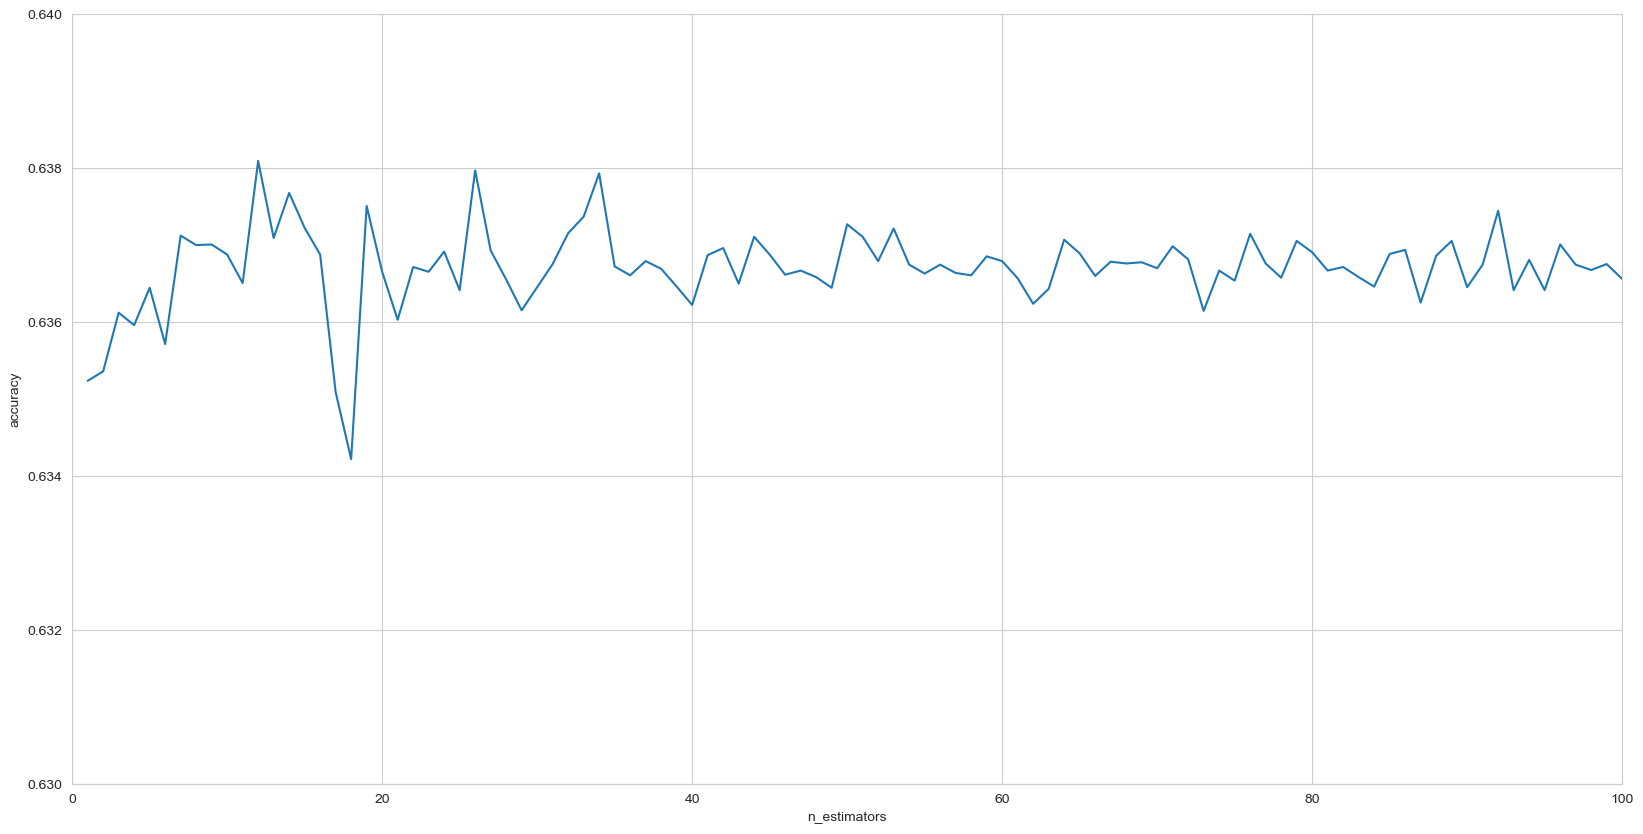

In [42]:
import matplotlib.pyplot as plt

X = df[['Class', 'Departure Delay in Minutes', 'On-board service', 'Cleanliness']].values
Y = df['satisfaction'].values 

n_estimators = list(range(1, 101))
param_grid = {'n_estimators': n_estimators,}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, Y)
scores = gs.cv_results_['mean_test_score']
import matplotlib.pyplot as plt
scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.63, 0.64)
plt.show()

8. Dokonaj wyboru istotnych cech

In [62]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('Airline.csv')

from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=101)

rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, Y_train)

ft_imp = pd.Series(rf.feature_importances_,
index=feature_names).sort_values(ascending=False)
print(ft_imp.head(10))

feature 1    0.681272
feature 0    0.318728
dtype: float64
